In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('Brain'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Brain\Test\glioma_tumor\image(1).jpg
Brain\Test\glioma_tumor\image(10).jpg
Brain\Test\glioma_tumor\image(100).jpg
Brain\Test\glioma_tumor\image(11).jpg
Brain\Test\glioma_tumor\image(12).jpg
Brain\Test\glioma_tumor\image(13).jpg
Brain\Test\glioma_tumor\image(14).jpg
Brain\Test\glioma_tumor\image(15).jpg
Brain\Test\glioma_tumor\image(16).jpg
Brain\Test\glioma_tumor\image(17).jpg
Brain\Test\glioma_tumor\image(18).jpg
Brain\Test\glioma_tumor\image(19).jpg
Brain\Test\glioma_tumor\image(2).jpg
Brain\Test\glioma_tumor\image(20).jpg
Brain\Test\glioma_tumor\image(21).jpg
Brain\Test\glioma_tumor\image(22).jpg
Brain\Test\glioma_tumor\image(23).jpg
Brain\Test\glioma_tumor\image(24).jpg
Brain\Test\glioma_tumor\image(25).jpg
Brain\Test\glioma_tumor\image(26).jpg
Brain\Test\glioma_tumor\image(27).jpg
Brain\Test\glioma_tumor\image(28).jpg
Brain\Test\glioma_tumor\image(29).jpg
Brain\Test\glioma_tumor\image(3).jpg
Brain\Test\glioma_tumor\image(30).jpg
Brain\Test\glioma_tumor\image(31).jpg
Brain\Test\gli

Brain\Test\no_tumor\image(1).jpg
Brain\Test\no_tumor\image(10).jpg
Brain\Test\no_tumor\image(100).jpg
Brain\Test\no_tumor\image(101).jpg
Brain\Test\no_tumor\image(102).jpg
Brain\Test\no_tumor\image(103).jpg
Brain\Test\no_tumor\image(104).jpg
Brain\Test\no_tumor\image(105).jpg
Brain\Test\no_tumor\image(11).jpg
Brain\Test\no_tumor\image(12).jpg
Brain\Test\no_tumor\image(13).jpg
Brain\Test\no_tumor\image(14).jpg
Brain\Test\no_tumor\image(15).jpg
Brain\Test\no_tumor\image(16).jpg
Brain\Test\no_tumor\image(17).jpg
Brain\Test\no_tumor\image(18).jpg
Brain\Test\no_tumor\image(19).jpg
Brain\Test\no_tumor\image(2).jpg
Brain\Test\no_tumor\image(20).jpg
Brain\Test\no_tumor\image(21).jpg
Brain\Test\no_tumor\image(22).jpg
Brain\Test\no_tumor\image(23).jpg
Brain\Test\no_tumor\image(24).jpg
Brain\Test\no_tumor\image(25).jpg
Brain\Test\no_tumor\image(26).jpg
Brain\Test\no_tumor\image(27).jpg
Brain\Test\no_tumor\image(28).jpg
Brain\Test\no_tumor\image(29).jpg
Brain\Test\no_tumor\image(3).jpg
Brain\Test\

Brain\Train\meningioma_tumor\m (1).jpg
Brain\Train\meningioma_tumor\m (10).jpg
Brain\Train\meningioma_tumor\m (100).jpg
Brain\Train\meningioma_tumor\m (101).jpg
Brain\Train\meningioma_tumor\m (102).jpg
Brain\Train\meningioma_tumor\m (103).jpg
Brain\Train\meningioma_tumor\m (104).jpg
Brain\Train\meningioma_tumor\m (105).jpg
Brain\Train\meningioma_tumor\m (106).jpg
Brain\Train\meningioma_tumor\m (107).jpg
Brain\Train\meningioma_tumor\m (108).jpg
Brain\Train\meningioma_tumor\m (109).jpg
Brain\Train\meningioma_tumor\m (11).jpg
Brain\Train\meningioma_tumor\m (110).jpg
Brain\Train\meningioma_tumor\m (111).jpg
Brain\Train\meningioma_tumor\m (112).jpg
Brain\Train\meningioma_tumor\m (113).jpg
Brain\Train\meningioma_tumor\m (114).jpg
Brain\Train\meningioma_tumor\m (115).jpg
Brain\Train\meningioma_tumor\m (116).jpg
Brain\Train\meningioma_tumor\m (117).jpg
Brain\Train\meningioma_tumor\m (118).jpg
Brain\Train\meningioma_tumor\m (119).jpg
Brain\Train\meningioma_tumor\m (12).jpg
Brain\Train\meningiom

Brain\Train\no_tumor\image(1).jpg
Brain\Train\no_tumor\image(10).jpg
Brain\Train\no_tumor\image(100).jpg
Brain\Train\no_tumor\image(101).jpg
Brain\Train\no_tumor\image(102).jpg
Brain\Train\no_tumor\image(103).jpg
Brain\Train\no_tumor\image(104).jpg
Brain\Train\no_tumor\image(105).jpg
Brain\Train\no_tumor\image(106).jpg
Brain\Train\no_tumor\image(107).jpg
Brain\Train\no_tumor\image(108).jpg
Brain\Train\no_tumor\image(109).jpg
Brain\Train\no_tumor\image(11).jpg
Brain\Train\no_tumor\image(110).jpg
Brain\Train\no_tumor\image(111).jpg
Brain\Train\no_tumor\image(112).jpg
Brain\Train\no_tumor\image(113).jpg
Brain\Train\no_tumor\image(114).jpg
Brain\Train\no_tumor\image(115).jpg
Brain\Train\no_tumor\image(116).jpg
Brain\Train\no_tumor\image(117).jpg
Brain\Train\no_tumor\image(118).jpg
Brain\Train\no_tumor\image(119).jpg
Brain\Train\no_tumor\image(12).jpg
Brain\Train\no_tumor\image(120).jpg
Brain\Train\no_tumor\image(121).jpg
Brain\Train\no_tumor\image(122).jpg
Brain\Train\no_tumor\image(123).j

Brain\Train\pituitary_tumor\p (1).jpg
Brain\Train\pituitary_tumor\p (10).jpg
Brain\Train\pituitary_tumor\p (100).jpg
Brain\Train\pituitary_tumor\p (101).jpg
Brain\Train\pituitary_tumor\p (102).jpg
Brain\Train\pituitary_tumor\p (103).jpg
Brain\Train\pituitary_tumor\p (104).jpg
Brain\Train\pituitary_tumor\p (105).jpg
Brain\Train\pituitary_tumor\p (106).jpg
Brain\Train\pituitary_tumor\p (107).jpg
Brain\Train\pituitary_tumor\p (108).jpg
Brain\Train\pituitary_tumor\p (109).jpg
Brain\Train\pituitary_tumor\p (11).jpg
Brain\Train\pituitary_tumor\p (110).jpg
Brain\Train\pituitary_tumor\p (111).jpg
Brain\Train\pituitary_tumor\p (112).jpg
Brain\Train\pituitary_tumor\p (113).jpg
Brain\Train\pituitary_tumor\p (114).jpg
Brain\Train\pituitary_tumor\p (115).jpg
Brain\Train\pituitary_tumor\p (116).jpg
Brain\Train\pituitary_tumor\p (117).jpg
Brain\Train\pituitary_tumor\p (118).jpg
Brain\Train\pituitary_tumor\p (119).jpg
Brain\Train\pituitary_tumor\p (12).jpg
Brain\Train\pituitary_tumor\p (120).jpg
Brain

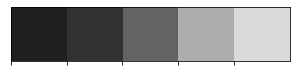

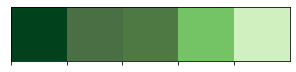

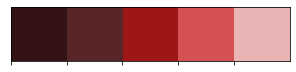

In [2]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [3]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [4]:
X_train = []
y_train = []
image_size = 128
for i in labels:
    folderPath = os.path.join('Brain/Train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('Brain/Test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:01<00:00, 63.57it/s]


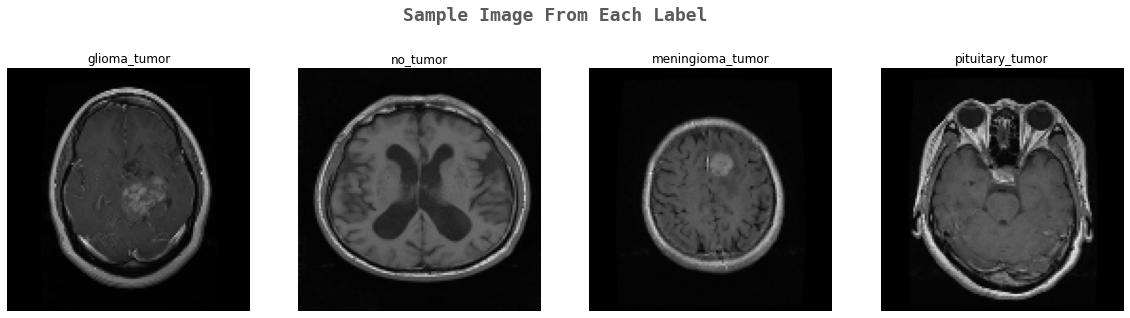

In [5]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [6]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [7]:
X_train.shape

(3264, 128, 128, 3)

In [8]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)
X_train.shape

(3264, 128, 128, 3)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
from tensorflow.keras.applications import ResNet152V2
resnet = ResNet152V2(weights='imagenet', include_top=False,input_shape=(image_size,image_size,3))

In [12]:
model = resnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=resnet.input, outputs = model)

In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 66, 66, 64)   0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [14]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [15]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("ResNet152V2.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [16]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
 1/83 [..............................] - ETA: 0s - loss: 1.7307 - accuracy: 0.2188WARNING:tensorflow:From C:\Users\Anorb\anaconda3\envs\Tensorflow_env\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
83/83 [==============================] - ETA: 0s - loss: 0.8791 - accuracy: 0.6663 
Epoch 00001: val_accuracy improved from -inf to 0.17007, saving model to ResNet152V2.h5
83/83 [==============================] - 1721s 21s/step - loss: 0.8791 - accuracy: 0.6663 - val_loss: 821.2975 - val_accuracy: 0.1701
Epoch 2/20
83/83 [==============================] - ETA: 0s - loss: 0.4711 - accuracy: 0.8313 
Epoch 00002: val_accuracy improved from 0.17007 to 0.46599, saving model to ResNet152V2.h5
83/83 [==============================] - 1715s 21s/step - loss: 0.4711 - accuracy: 0.8313 - val_loss: 3.9225 - va

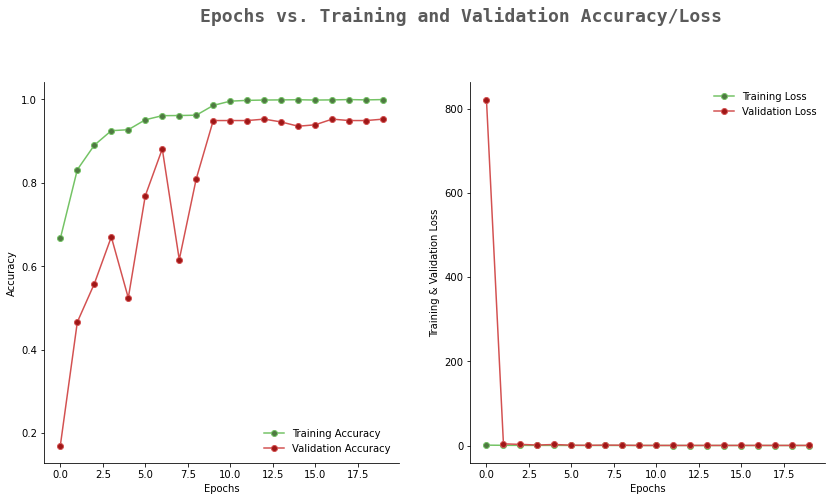

In [17]:
filterwarnings('ignore')

epochs = [i for i in range(20)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [18]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [19]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        93
           1       0.98      0.98      0.98        51
           2       0.96      0.97      0.96        96
           3       0.98      1.00      0.99        87

    accuracy                           0.97       327
   macro avg       0.97      0.97      0.97       327
weighted avg       0.97      0.97      0.97       327



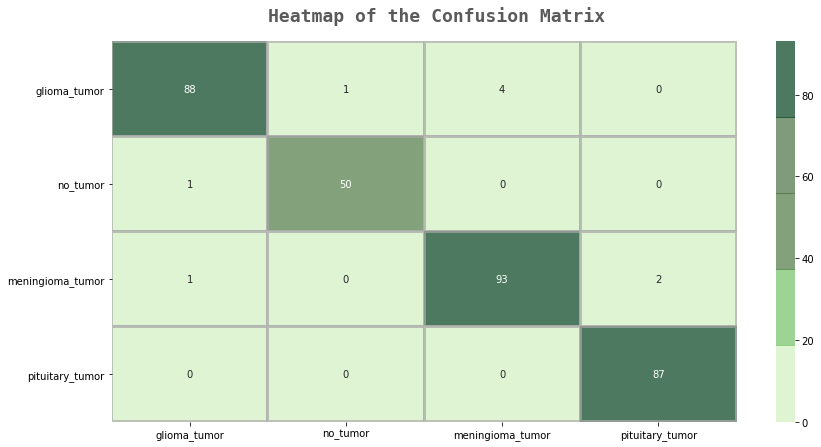

In [20]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()